In [1]:
import sys
sys.path.append(r'/Users/kostastsampourakis/Desktop/code/Python/projects/gaussfiltax')

import time

from jax import numpy as jnp
from jax import random as jr
from tensorflow_probability.substrates.jax.distributions import MultivariateNormalFullCovariance as MVN
# import tensorflow as tf
# tf.test.gpu_device_name()

import gaussfiltax.utils as utils
import gaussfiltax.inference as gf
from gaussfiltax.models import ParamsNLSSM, NonlinearSSM, ParamsBPF

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## Models and simulations

In [2]:
# Parameters
state_dim = 4
state_noise_dim = 2
emission_dim = 1
emission_noise_dim = 1
seq_length = 30
mu0 = 1.0 * jnp.array([-0.05, 0.001, 0.7, -0.05])
# mu0 = jnp.ones(state_dim)
q0 = jnp.zeros(state_noise_dim)
r0 = jnp.zeros(emission_noise_dim)
Sigma0 = 1.0 * jnp.array([[0.1, 0.0, 0.0, 0.0],[0.0, 0.005, 0.0, 0.0],[0.0, 0.0, 0.1, 0.0],[0.0, 0.0, 0.0, 0.01]])
Q = 1e-6 * jnp.eye(state_noise_dim)
R = 25*1e-6 * jnp.eye(emission_noise_dim)

theta = jnp.pi/50
F = jnp.array([[1, 1, 0, 0],[0, 1, 0, 0],[0, 0, 1, 1],[0, 0, 0, 1]])
# F = jnp.array([[jnp.cos(theta), jnp.sin(theta), 0, 0],[0, 1, 0, 0],[0, 0, -jnp.sin(theta), jnp.cos(theta)],[0, 0, 0, 1]])
G = jnp.array([[0.5, 0],[1, 0],[0, 0.5],[0, 1]])
fBOT = lambda x, q, u: F @ x + G @ q
gBOT = lambda x, r, u: jnp.arctan2(x[2], x[0]) + r
gBOTlp = lambda x, y, u: MVN(loc = gBOT(x, 0.0, u), covariance_matrix = R).log_prob(y)
inputs = jnp.zeros((seq_length, 1))

In [3]:
f = fBOT
g = gBOT
glp = gBOTlp

In [4]:
# initialization
model = NonlinearSSM(state_dim, state_noise_dim, emission_dim, emission_noise_dim)
params = ParamsNLSSM(
    initial_mean=mu0,
    initial_covariance=Sigma0,
    dynamics_function=f,
    dynamics_noise_bias= q0,
    dynamics_noise_covariance=Q,
    emission_function=g,
    emission_noise_bias= r0,
    emission_noise_covariance=R,
)

## Experiments

sim 1/20
key:  [0 0]
       Time taken for GSF:  0.36966681480407715
       Time taken for AGSF:  3.3528971672058105
       Time taken for AGSF optimal:  3.2518179416656494
       Time taken for BPF:  0.6668338775634766
              GSF RMSE: 1.7406454
              AGSF RMSE: 0.6249628
              AGSF Optimal RMSE: 0.23914911
              BPF RMSE: 0.91525024


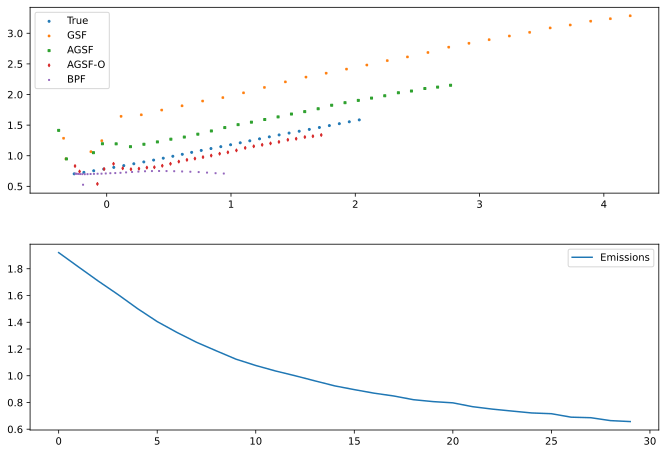

sim 2/20
key:  [2718843009 1272950319]
       Time taken for GSF:  0.169647216796875
       Time taken for AGSF:  3.0950839519500732
       Time taken for AGSF optimal:  3.3398406505584717
       Time taken for BPF:  0.37635183334350586
              GSF RMSE: 2.6348965
              AGSF RMSE: 0.9312421
              AGSF Optimal RMSE: 0.93278784
              BPF RMSE: 4.56011


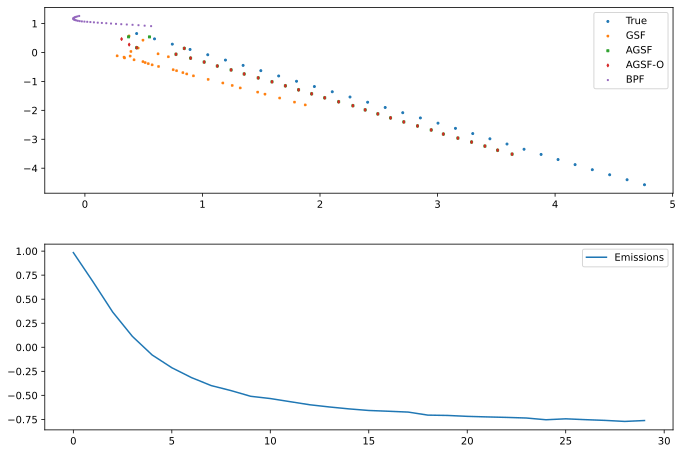

sim 3/20
key:  [1190051861 3378399878]
       Time taken for GSF:  0.16703391075134277
       Time taken for AGSF:  3.0573880672454834
       Time taken for AGSF optimal:  3.262302875518799
       Time taken for BPF:  0.40094685554504395
              GSF RMSE: 1.0457017
              AGSF RMSE: 0.9583932
              AGSF Optimal RMSE: 0.9504033
              BPF RMSE: 3.4316106


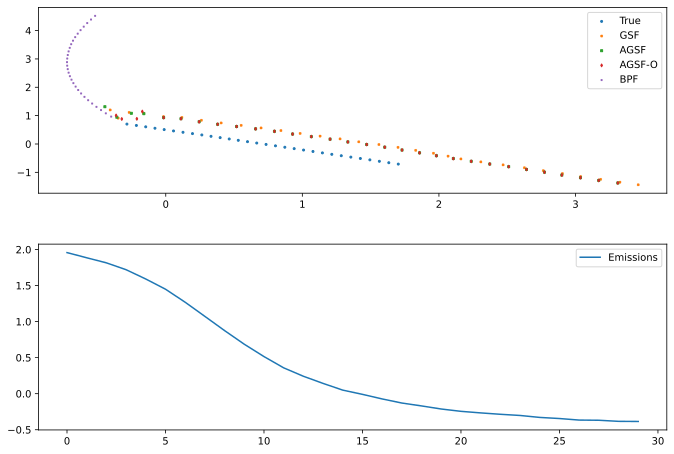

sim 4/20
key:  [ 796717106 1763558279]
       Time taken for GSF:  0.16704392433166504
       Time taken for AGSF:  3.189411163330078
       Time taken for AGSF optimal:  3.17533802986145
       Time taken for BPF:  0.3750028610229492
              GSF RMSE: 0.7120824
              AGSF RMSE: 0.7310985
              AGSF Optimal RMSE: 1.3580877
              BPF RMSE: 1.0366864


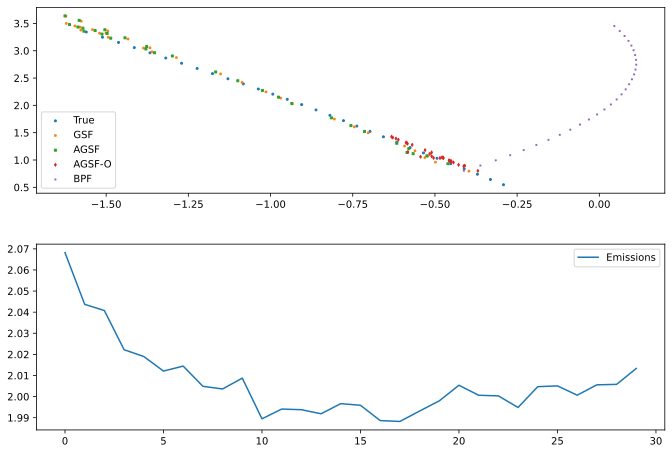

sim 5/20
key:  [2072131287 2756572625]
       Time taken for GSF:  0.1670377254486084
       Time taken for AGSF:  3.2176342010498047
       Time taken for AGSF optimal:  3.2009758949279785
       Time taken for BPF:  0.38435935974121094
              GSF RMSE: nan
              AGSF RMSE: 364.07822
              AGSF Optimal RMSE: 364.07822
              BPF RMSE: 2.093176


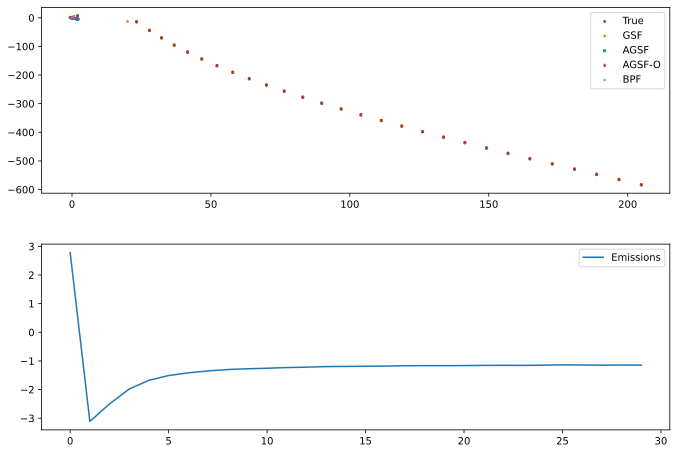

sim 6/20
key:  [2088994074  326295003]
       Time taken for GSF:  0.16984820365905762
       Time taken for AGSF:  3.15368390083313
       Time taken for AGSF optimal:  3.3055739402770996
       Time taken for BPF:  0.3914370536804199
              GSF RMSE: 0.068445966
              AGSF RMSE: 0.08609015
              AGSF Optimal RMSE: 0.054894775
              BPF RMSE: 2.3141837


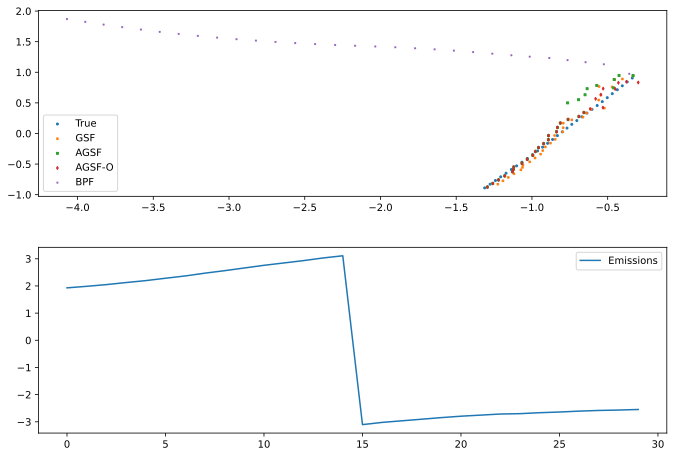

sim 7/20
key:  [ 151527188 1225481312]
       Time taken for GSF:  0.1714789867401123
       Time taken for AGSF:  3.1315088272094727
       Time taken for AGSF optimal:  3.295322895050049
       Time taken for BPF:  0.3801562786102295
              GSF RMSE: 1.8422977
              AGSF RMSE: 0.11540637
              AGSF Optimal RMSE: 0.53477806
              BPF RMSE: 1.6338027


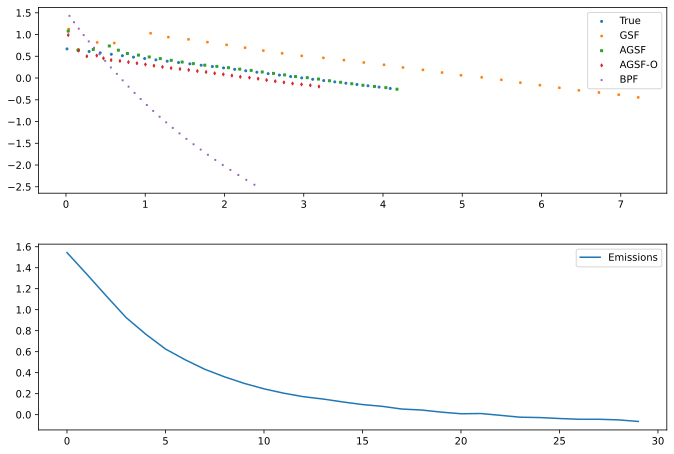

sim 8/20
key:  [3896410491  852424179]
       Time taken for GSF:  0.1705620288848877
       Time taken for AGSF:  3.1188223361968994
       Time taken for AGSF optimal:  3.3653500080108643
       Time taken for BPF:  0.3925349712371826
              GSF RMSE: 0.9712405
              AGSF RMSE: 0.84374267
              AGSF Optimal RMSE: 0.84690326
              BPF RMSE: 0.9901365


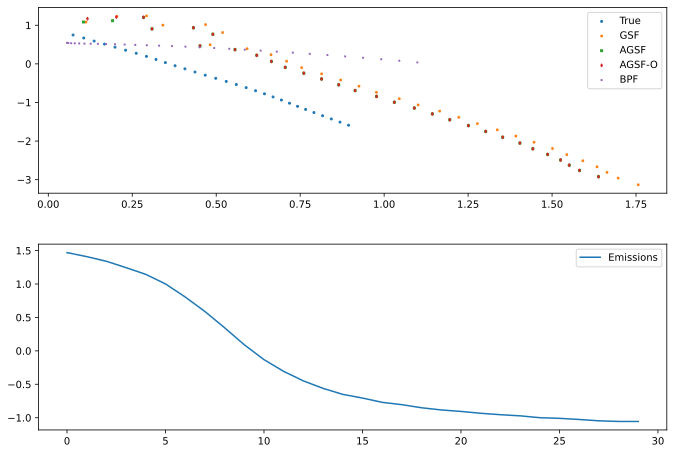

sim 9/20
key:  [3708709125 2774982739]
       Time taken for GSF:  0.17099690437316895
       Time taken for AGSF:  3.1936919689178467
       Time taken for AGSF optimal:  3.288681983947754
       Time taken for BPF:  0.3990509510040283
              GSF RMSE: 3.6123595
              AGSF RMSE: 3.0593839
              AGSF Optimal RMSE: 3.0576854
              BPF RMSE: 0.8267389


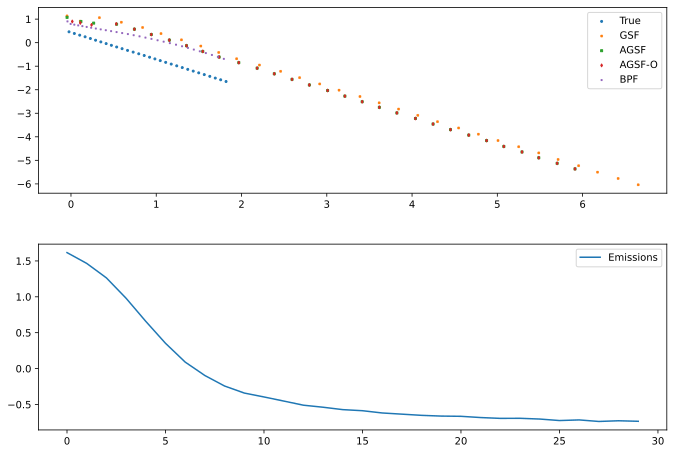

sim 10/20
key:  [3549801624 1650329275]
       Time taken for GSF:  0.1701822280883789
       Time taken for AGSF:  3.2296149730682373
       Time taken for AGSF optimal:  3.2675514221191406
       Time taken for BPF:  0.3809201717376709
              GSF RMSE: 0.85763824
              AGSF RMSE: 0.95550734
              AGSF Optimal RMSE: 0.9544112
              BPF RMSE: 1.5338897


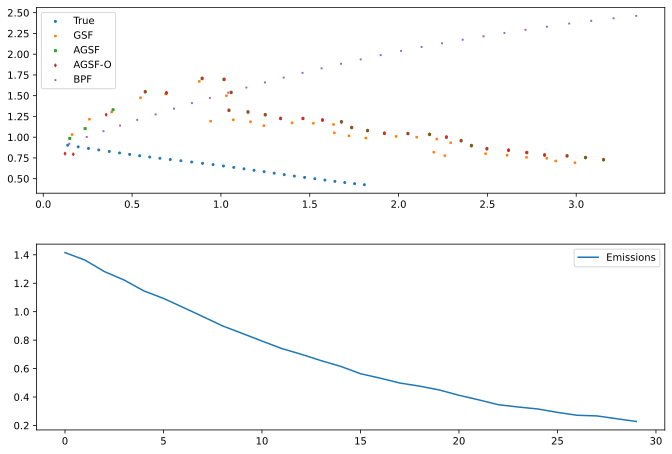

sim 11/20
key:  [3951902972 2777172562]
       Time taken for GSF:  0.16896486282348633
       Time taken for AGSF:  3.23641300201416
       Time taken for AGSF optimal:  3.201875925064087
       Time taken for BPF:  0.37925100326538086
              GSF RMSE: nan
              AGSF RMSE: 26.1386
              AGSF Optimal RMSE: 26.13868
              BPF RMSE: 0.44409278


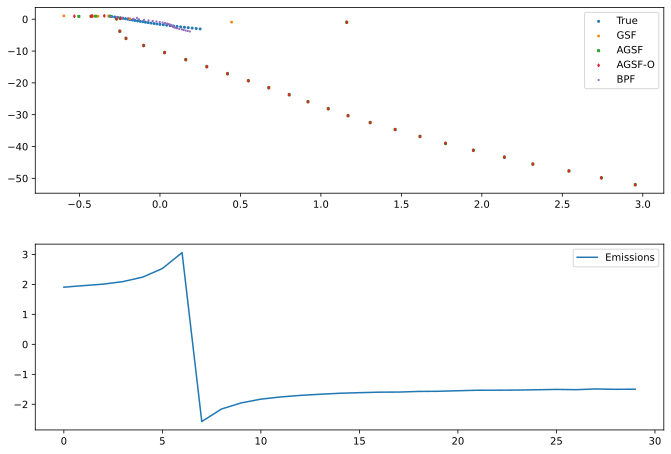

sim 12/20
key:  [4181466912 2745674076]
       Time taken for GSF:  0.17091679573059082
       Time taken for AGSF:  3.1627590656280518
       Time taken for AGSF optimal:  3.3647100925445557
       Time taken for BPF:  0.384307861328125
              GSF RMSE: 6.4954805
              AGSF RMSE: 1.5924977
              AGSF Optimal RMSE: 1.5924546
              BPF RMSE: 2.1949143


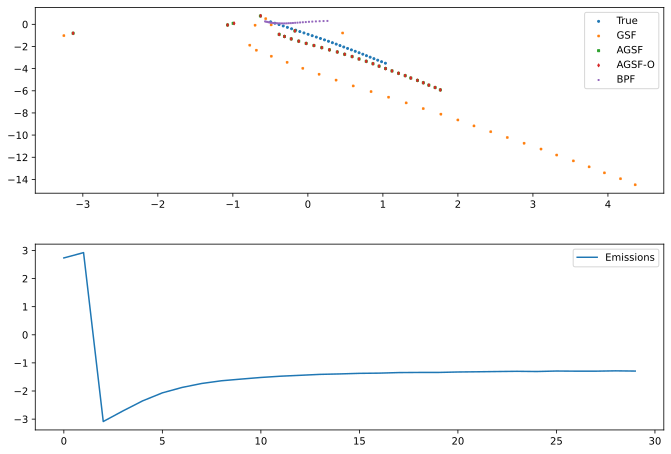

sim 13/20
key:  [1777401963  186956683]
       Time taken for GSF:  0.17338013648986816
       Time taken for AGSF:  3.1204400062561035
       Time taken for AGSF optimal:  3.258113145828247
       Time taken for BPF:  0.38039517402648926
              GSF RMSE: nan
              AGSF RMSE: 6.392262
              AGSF Optimal RMSE: 6.392699
              BPF RMSE: 2.4844542


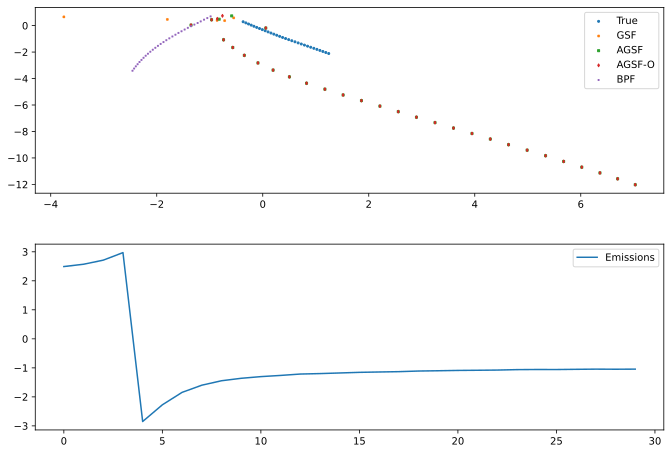

sim 14/20
key:  [3503514159 1190718348]
       Time taken for GSF:  0.1656801700592041
       Time taken for AGSF:  3.279015064239502
       Time taken for AGSF optimal:  3.26580810546875
       Time taken for BPF:  0.38899803161621094
              GSF RMSE: 0.17547202
              AGSF RMSE: 0.41748953
              AGSF Optimal RMSE: 0.41980806
              BPF RMSE: 3.2150366


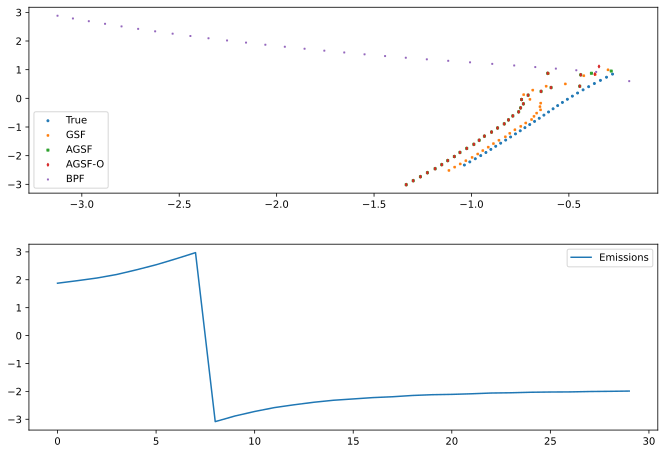

sim 15/20
key:  [1813180281   92782245]
       Time taken for GSF:  0.1721951961517334
       Time taken for AGSF:  3.15275502204895
       Time taken for AGSF optimal:  3.383368968963623
       Time taken for BPF:  0.397916316986084
              GSF RMSE: 0.33487052
              AGSF RMSE: 7.161701
              AGSF Optimal RMSE: 7.1615615
              BPF RMSE: 3.8701258


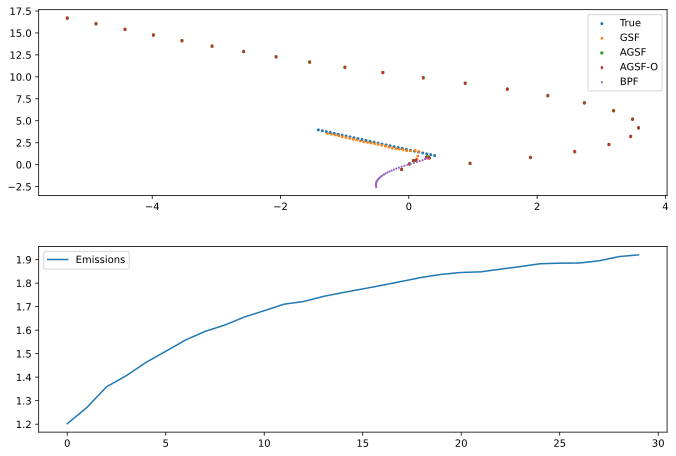

sim 16/20
key:  [ 555130811 1100944110]
       Time taken for GSF:  0.17372822761535645
       Time taken for AGSF:  3.169111967086792
       Time taken for AGSF optimal:  3.320780038833618
       Time taken for BPF:  0.3892862796783447
              GSF RMSE: 0.5818906
              AGSF RMSE: 0.6133701
              AGSF Optimal RMSE: 0.6146756
              BPF RMSE: 0.31586418


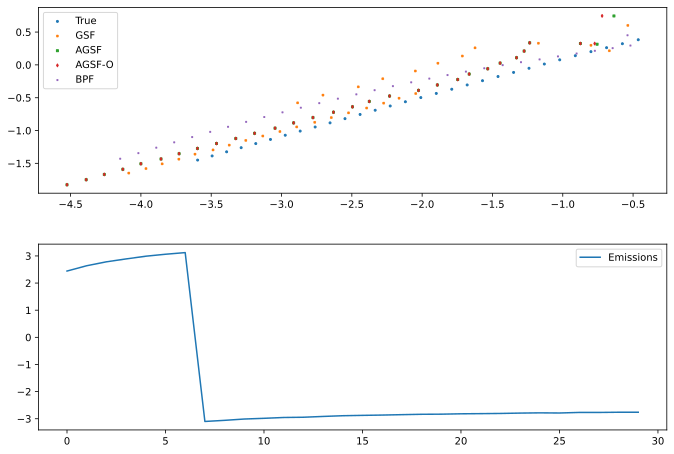

sim 17/20
key:  [1120068268 2630412346]
       Time taken for GSF:  0.17560482025146484
       Time taken for AGSF:  3.2593209743499756
       Time taken for AGSF optimal:  3.2664101123809814
       Time taken for BPF:  0.38173413276672363
              GSF RMSE: 57.6526
              AGSF RMSE: 132.33905
              AGSF Optimal RMSE: 132.33907
              BPF RMSE: 2.3467548


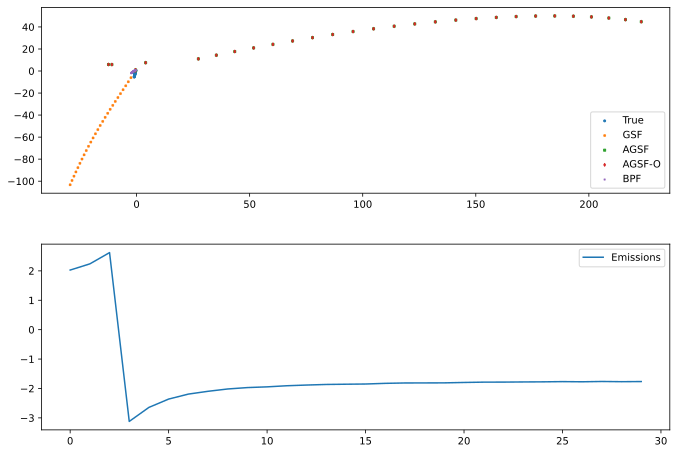

sim 18/20
key:  [3842495687  641878377]
       Time taken for GSF:  0.16920709609985352
       Time taken for AGSF:  3.149155855178833
       Time taken for AGSF optimal:  3.275463819503784
       Time taken for BPF:  0.3832838535308838
              GSF RMSE: 2.0507827
              AGSF RMSE: 1.1561843
              AGSF Optimal RMSE: 1.1568527
              BPF RMSE: 1.0987885


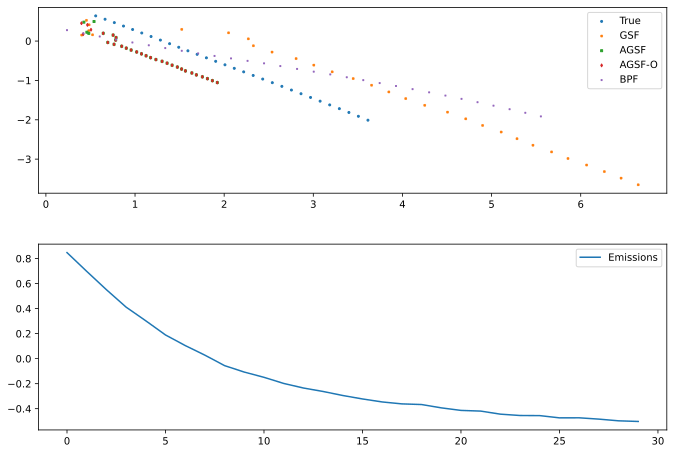

sim 19/20
key:  [1457450470 2039177778]
       Time taken for GSF:  0.18171381950378418
       Time taken for AGSF:  3.1862411499023438
       Time taken for AGSF optimal:  3.2932350635528564
       Time taken for BPF:  0.384138822555542
              GSF RMSE: 0.39877352
              AGSF RMSE: 0.36888146
              AGSF Optimal RMSE: 0.37623987
              BPF RMSE: 3.982082


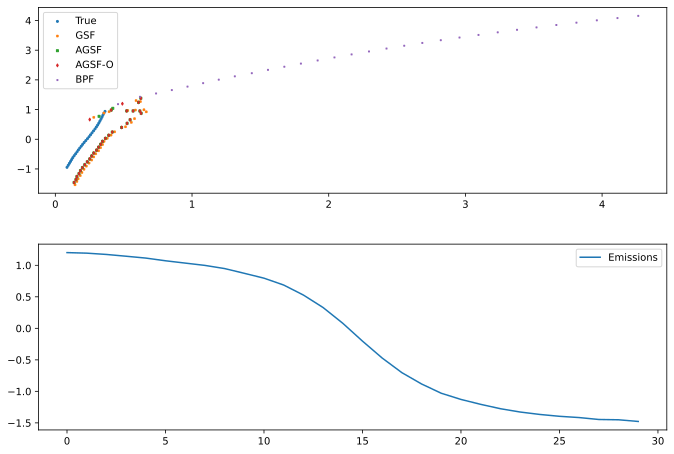

sim 20/20
key:  [2112071872 2813633235]
       Time taken for GSF:  0.17018389701843262
       Time taken for AGSF:  3.15564227104187
       Time taken for AGSF optimal:  3.4078688621520996
       Time taken for BPF:  0.37685704231262207
              GSF RMSE: 0.49567705
              AGSF RMSE: 0.94338137
              AGSF Optimal RMSE: 0.479539
              BPF RMSE: 2.0586047


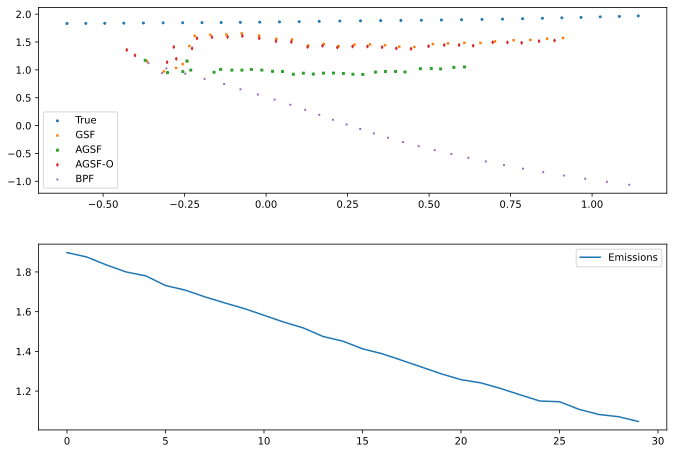

In [5]:
verbose = False
Nsim = 20
gsf_rmse = jnp.zeros(Nsim)
agsf_rmse = jnp.zeros(Nsim)
agsf_opt_rmse = jnp.zeros(Nsim)
bpf_rmse = jnp.zeros(Nsim)
gsf_norm = jnp.zeros((Nsim, seq_length))
agsf_norm = jnp.zeros((Nsim, seq_length))
agsf_opt_norm = jnp.zeros((Nsim, seq_length))
bpf_norm = jnp.zeros((Nsim, seq_length))
gsf_time = jnp.zeros(Nsim)
agsf_time = jnp.zeros(Nsim)
agsf_opt_time = jnp.zeros(Nsim)
bpf_time = jnp.zeros(Nsim)
next_key = jr.PRNGKey(0)
for i in range(Nsim):
    print('sim {}/{}'.format(i+1, Nsim))
    # Generate Data
    print('key: ', next_key)
    key, next_key = jr.split(next_key)
    states, emissions = model.sample(params, key, seq_length, inputs = inputs)

    # GSF
    M = 5
    tin = time.time()
    posterior_filtered_gsf = gf.gaussian_sum_filter(params, emissions, M, 1, inputs)
    point_estimate_gsf = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_filtered_gsf.means, posterior_filtered_gsf.weights), axis=0)
    tout = time.time()
    t_gsf= tout - tin
    print('       Time taken for GSF: ', tout - tin)

    # AGSF
    opt_args = (1.0, 10.0)
    num_components = [M, 1, 5] # has to be set correctly OW "TypeError: Cannot interpret '<function <lambda> at 0x12eae3ee0>' as a data type". Check internal containers._branch_from_node


    tin = time.time()
    posterior_filtered_agsf, aux_outputs = gf.augmented_gaussian_sum_filter(params, emissions, num_components, rng_key = key, opt_args = opt_args, inputs=inputs)    
    point_estimate_agsf = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_filtered_agsf.means, posterior_filtered_agsf.weights), axis=0)
    tout = time.time()
    t_agsf= tout - tin
    print('       Time taken for AGSF: ', tout - tin)

    # AGSF Optimal
    tin = time.time()
    posterior_filtered_agsf_opt, aux_outputs_opt = gf.augmented_gaussian_sum_filter_optimal(params, emissions, num_components, rng_key = key, opt_args = opt_args, inputs=inputs)    
    point_estimate_agsf_opt = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_filtered_agsf_opt.means, posterior_filtered_agsf_opt.weights), axis=0)
    tout = time.time()
    t_agsf_opt= tout - tin
    print('       Time taken for AGSF optimal: ', tout - tin)

    # BPF
    tin = time.time()
    num_particles = 100

    params_bpf = ParamsBPF(
        initial_mean=mu0,
        initial_covariance=Sigma0,
        dynamics_function=f,
        dynamics_noise_bias=q0,
        dynamics_noise_covariance=Q,
        emission_function=g,
        emission_noise_bias=r0,
        emission_noise_covariance=R,
        emission_distribution_log_prob = glp
    )

    posterior_bpf = gf.bootstrap_particle_filter(params_bpf, emissions, num_particles, key, inputs)
    point_estimate_bpf = jnp.sum(jnp.einsum('ijk,ij->ijk', posterior_bpf["particles"], posterior_bpf["weights"]), axis=0)
    tout = time.time()
    t_bpf = tout - tin
    print('       Time taken for BPF: ', tout - tin)

    # Computation of errors
    gsf_rmse = gsf_rmse.at[i].set(utils.rmse(point_estimate_gsf, states))
    agsf_rmse = agsf_rmse.at[i].set(utils.rmse(point_estimate_agsf, states))
    agsf_opt_rmse = agsf_opt_rmse.at[i].set(utils.rmse(point_estimate_agsf_opt, states))
    bpf_rmse = bpf_rmse.at[i].set(utils.rmse(point_estimate_bpf, states))

    print('              GSF RMSE:', gsf_rmse[i])                                                                           
    print('              AGSF RMSE:', agsf_rmse[i])
    print('              AGSF Optimal RMSE:', agsf_opt_rmse[i])
    print('              BPF RMSE:', bpf_rmse[i])

    gsf_norm = gsf_norm.at[i].set(jnp.linalg.norm(point_estimate_gsf - states, axis = 1))
    agsf_norm = agsf_norm.at[i].set(jnp.linalg.norm(point_estimate_agsf - states, axis = 1))
    agsf_opt_norm = agsf_opt_norm.at[i].set(jnp.linalg.norm(point_estimate_agsf_opt - states, axis = 1))
    bpf_norm = bpf_norm.at[i].set(jnp.linalg.norm(point_estimate_bpf - states, axis = 1))

    gsf_time = gsf_time.at[i].set(t_gsf)
    agsf_time = agsf_time.at[i].set(t_agsf)
    agsf_opt_time = agsf_opt_time.at[i].set(t_agsf_opt)
    bpf_time = bpf_time.at[i].set(t_bpf)

    fig, axes = plt.subplots(2, 1, sharex=False, figsize=(10, 7))
    fig.tight_layout(pad=3.0)
    axes[0].scatter(states[:,0], states[:,2], label = 'True', s = 4)
    axes[0].scatter(point_estimate_gsf[:,0], point_estimate_gsf[:,2], label = 'GSF', s = 4, marker = 'x')
    axes[0].scatter(point_estimate_agsf[:,0], point_estimate_agsf[:,2], label = 'AGSF', s = 4, marker = 's')
    axes[0].scatter(point_estimate_agsf_opt[:,0], point_estimate_agsf_opt[:,2], label = 'AGSF-O', s = 4, marker= 'd')
    axes[0].scatter(point_estimate_bpf[:,0], point_estimate_bpf[:,2], label = 'BPF', s = 4, marker = '+')
    axes[0].legend()   

    axes[1].plot(emissions, label = 'Emissions')
    axes[1].legend()

    plt.show()


In [6]:
ind = jnp.argwhere(jnp.isnan(gsf_rmse)).flatten()
gsf_rmse = jnp.delete(gsf_rmse, ind, axis = 0)

In [7]:
import pandas as pd
gsf_armse = jnp.mean(gsf_rmse)
agsf_armse = jnp.mean(agsf_rmse)
agsf_opt_armse = jnp.mean(agsf_opt_rmse)
bpf_armse = jnp.mean(bpf_rmse)

gsf_atime = jnp.mean(gsf_time)
agsf_atime = jnp.mean(agsf_time)
agsf_opt_atime = jnp.mean(agsf_opt_time)
bpf_atime = jnp.mean(bpf_time)

gsf_tab_out = '{:10.2f}±{:10.2f}'.format(gsf_armse, jnp.std(gsf_rmse))
agsf_tab_out = '{:10.2f}±{:10.2f}'.format(agsf_armse, jnp.std(agsf_rmse))
agsf_opt_tab_out = '{:10.2f}±{:10.2f}'.format(agsf_opt_armse, jnp.std(agsf_opt_rmse))
bpf_tab_out = '{:10.2f}±{:10.2f}'.format(bpf_armse, jnp.std(bpf_rmse))

gsf_tab_out1 = '{:10.2f}±{:10.2f}'.format(gsf_atime, jnp.std(gsf_time))
agsf_tab_out1 = '{:10.2f}±{:10.2f}'.format(agsf_atime, jnp.std(agsf_time))
agsf_opt_tab_out1 = '{:10.2f}±{:10.2f}'.format(agsf_opt_atime, jnp.std(agsf_opt_time))
bpf_tab_out1 = '{:10.2f}±{:10.2f}'.format(bpf_atime, jnp.std(bpf_time))

df = pd.DataFrame(columns = [' ','RMSE','time(s)'])
df[' '] = ['GSF', 'AGSF', 'AGSF Optimal', 'BPF']
df['RMSE'] = [gsf_tab_out, agsf_tab_out, agsf_opt_tab_out, bpf_tab_out]
df['time(s)'] = [gsf_tab_out1, agsf_tab_out1, agsf_opt_tab_out1, bpf_tab_out1]
print(df.to_latex(index=False))
df

\begin{tabular}{lll}
\toprule
  & RMSE & time(s) \\
\midrule
GSF &       4.80±     13.30 &       0.18±      0.04 \\
AGSF &      27.48±     82.39 &       3.18±      0.07 \\
AGSF Optimal &      27.48±     82.39 &       3.29±      0.06 \\
BPF &       2.07±      1.20 &       0.40±      0.06 \\
\bottomrule
\end{tabular}



,,RMSE,time(s)
0,GSF,4.80± 13.30,0.18± 0.04
1,AGSF,27.48± 82.39,3.18± 0.07
2,AGSF Optimal,27.48± 82.39,3.29± 0.06
3,BPF,2.07± 1.20,0.40± 0.06


## Plots

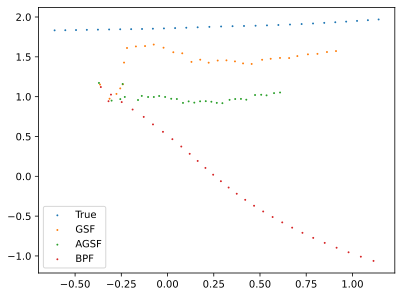

In [8]:
plt.scatter(states[:,0], states[:,2], label = 'True', s = 1)
plt.scatter(point_estimate_gsf[:,0], point_estimate_gsf[:,2], label = 'GSF', s = 1)
plt.scatter(point_estimate_agsf[:,0], point_estimate_agsf[:,2], label = 'AGSF', s = 1)
plt.scatter(point_estimate_bpf[:,0], point_estimate_bpf[:,2], label = 'BPF', s = 1)
plt.legend()   
plt.show()